<a href="https://colab.research.google.com/github/mcristinee/Aulas-Alura-Quarentenadados/blob/master/Aulas_An%C3%A1lise_de_Dados_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Primeira Aula da #Quarentenadados

Aqui aprendemos a importar dados do github, computador ou próprio Drive. 



In [0]:
print ("Michelle Cristine")

Michelle Cristine


In [0]:
nome_do_filme = "Totoro, o filme"

In [0]:
import pandas as pd

In [0]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
# filmes é um DataFrame
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")

In [0]:
# Lembrr de colocar os parenteses depois do head... pq é uma funcao
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
avaliacoes.shape
#Me mostra o formato do arquivo - (linhas, colunas)

(100836, 4)

In [0]:
#mudando o nome das variáveis
avaliacoes.columns = ["usuarioId","filmeId","nota","momento"]

In [0]:
#visao geral do arquivo parecida com summary() do R. 
avaliacoes.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [0]:
avaliacoes.query("filmeId==1")["nota"].mean()

3.9209302325581397

In [0]:
avaliacoes_do_filme_1 = avaliacoes.query("filmeId==1")

In [0]:
#gerar uma tabela de médias agrupada pelo filme

avaliacoes.groupby("filmeId")
#depois de agrupado sempre tem que pedir a funçao.
avaliacoes.groupby("filmeId").mean()
#Ele faz a média de tudo. Entao é melhor extrair as colunas que queremos primeiro
notas_medias_por_filme=avaliacoes.groupby("filmeId")["nota"].mean()
#Vamos juntar 2 conjuntos de dados - dataframe + series
filmes_com_media=filmes.join(notas_medias_por_filme,on = "filmeId")
#Ordenar e colocar os melhores no topo
filmes_ord=filmes_com_media.sort_values("nota", ascending=False)



In [0]:
filmes_com_media .head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


#Plotando Dados Plots básicos


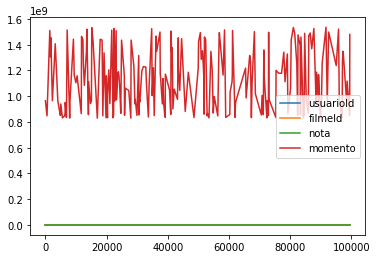

In [0]:
# plotar Filmes 1,2,102084
avaliacoes.query("filmeId==1").plot() #Grafico sem sentido, vamos plotar distribuicao

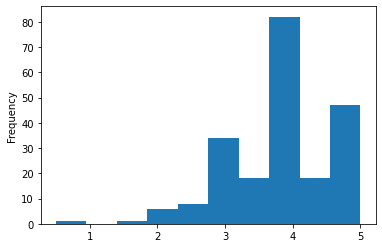

In [0]:
avaliacoes.query("filmeId==1")["nota"].plot(kind="hist")

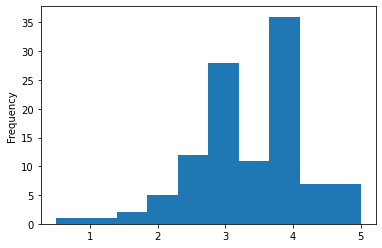

In [0]:
avaliacoes.query("filmeId==2")["nota"].plot(kind="hist")

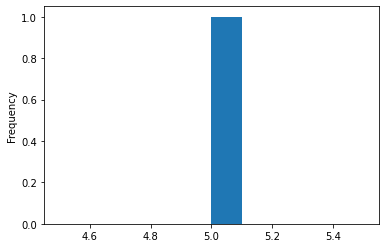

In [0]:
avaliacoes.query("filmeId==102084")["nota"].plot(kind="hist")

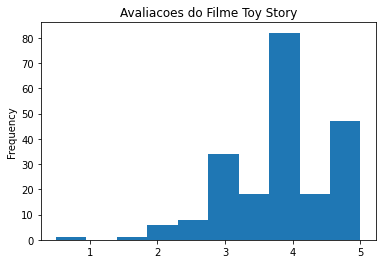

In [0]:
# Vamos Refinar com o Matplotlib
import matplotlib.pyplot as plt
avaliacoes.query("filmeId==1")["nota"].plot(kind="hist", title = "Avaliacoes do Filme Toy Story")

# **CODIGOS E DESAFIOS COPIADOS DO ARQUIVO DA AULA**

## Desafio 1 do [Paulo Silveira](https://twitter.com/paulo_caelum)

O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes.


In [0]:
filmes_sem_pontuacao=filmes_ord.tail(18)


## Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Mudar o nome da coluna nota do dataframe **filmes_com_media** para nota_média após o join.


In [0]:
filmes_com_media.columns = ["filmeId","titulo","genero","nota_média"]

## Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [0]:
n_avaliacoes = avaliacoes .groupby("filmeId")["nota"] .count()

## Desafio 4 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Arredondar as médias (coluna de nota média) para duas casas decimais.


In [0]:
 filmes_com_media.round({"nota_média":2}) .head()
 

,filmeId,titulo,genero,nota_média
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07


## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

In [0]:
generos_filmes = filmes["generos"] .str .get_dummies()

## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Contar o número de aparições de cada genero.

In [143]:
colunas = generos_filmes .columns

for coluna in colunas: 
  [nao_existe,existe] = generos_filmes[coluna] .value_counts()
  print(f"Generos de Filme {coluna}:{existe}")

  



Generos de Filme (no genres listed):34
Generos de Filme Action:1828
Generos de Filme Adventure:1263
Generos de Filme Animation:611
Generos de Filme Children:664
Generos de Filme Comedy:3756
Generos de Filme Crime:1199
Generos de Filme Documentary:440
Generos de Filme Drama:4361
Generos de Filme Fantasy:779
Generos de Filme Film-Noir:87
Generos de Filme Horror:978
Generos de Filme IMAX:158
Generos de Filme Musical:334
Generos de Filme Mystery:573
Generos de Filme Romance:1596
Generos de Filme Sci-Fi:980
Generos de Filme Thriller:1894
Generos de Filme War:382
Generos de Filme Western:167


0    9575
1     167
Name: Western, dtype: int64

## Desafio 7 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

# **SEGUNDA AULA QUARENTENADADOS **